# Ridge and Lasso Regression

## Why Regularization?
In Linear Regression, if the model tries to learn the training data *too well*, it may perform poorly on new data. This is called **overfitting**.

**Regularization** helps avoid overfitting by adding a penalty for large weights (coefficients) in the model.


## Ridge Regression (L2)
- Adds a penalty term: **sum of squares of coefficients**
- Cost Function: 
$$ J(\theta) = \text{MSE} + \lambda \sum_{j=1}^{n} \theta_j^2 $$


## Lasso Regression (L1)
- Adds a penalty term: **sum of absolute values of coefficients**
- Can reduce some coefficients to zero (useful for feature selection)
- Cost Function:
$$ J(\theta) = \text{MSE} + \lambda \sum_{j=1}^{n} |\theta_j| $$


In [4]:
# Load data and required libraries
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# Load the diabetes dataset
data = load_diabetes()
X = data.data
y = data.target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Train Linear, Ridge, and Lasso models
lr = LinearRegression()
ridge = Ridge(alpha=1.0)
lasso = Lasso(alpha=0.1)
elastic = ElasticNet(alpha=1.0, l1_ratio=0.5)

lr.fit(X_train, y_train)
ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)
elastic.fit(X_train, y_train)

# Predict
y_pred_lr = lr.predict(X_test)
y_pred_ridge = ridge.predict(X_test)
y_pred_lasso = lasso.predict(X_test)
y_pred_elastic = elastic.predict(X_test)

# Evaluate
print("Linear Regression MSE:", mean_squared_error(y_test, y_pred_lr))
print("Ridge Regression MSE:", mean_squared_error(y_test, y_pred_ridge))
print("Lasso Regression MSE:", mean_squared_error(y_test, y_pred_lasso))
print("Elastic Regression MSE:", mean_squared_error(y_test, y_pred_elastic))

Linear Regression MSE: 2900.1936284934814
Ridge Regression MSE: 3077.41593882723
Lasso Regression MSE: 2798.1934851697188
Elastic Regression MSE: 5311.21282167187


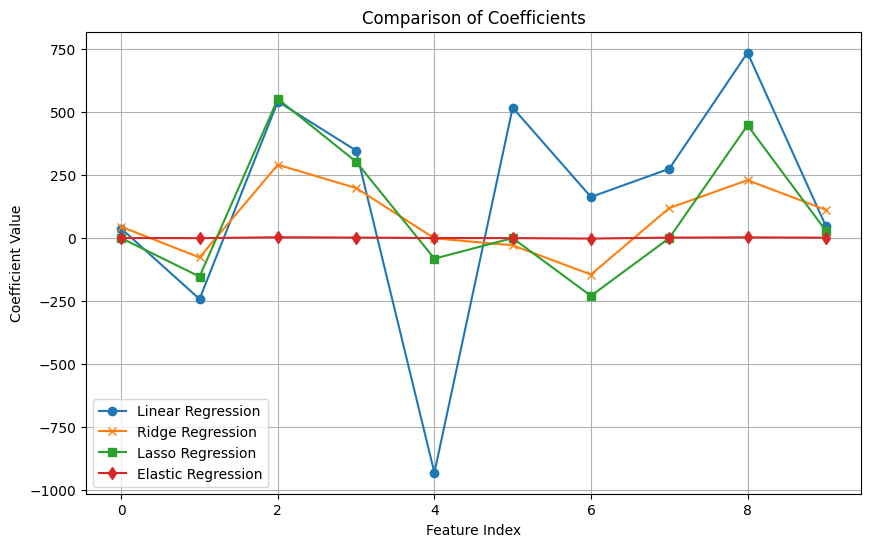

In [6]:
# Visualize the coefficients
plt.figure(figsize=(10,6))
plt.plot(lr.coef_, label='Linear Regression', marker='o')
plt.plot(ridge.coef_, label='Ridge Regression', marker='x')
plt.plot(lasso.coef_, label='Lasso Regression', marker='s')
plt.plot(elastic.coef_, label='Elastic Regression', marker='d')
plt.title('Comparison of Coefficients')
plt.xlabel('Feature Index')
plt.ylabel('Coefficient Value')
plt.legend()
plt.grid(True)
plt.show()

## Summary
- **Linear Regression** may overfit when features are correlated or too many
- **Ridge Regression**: shrinks coefficients (good when features are correlated)
- **Lasso Regression**: can eliminate unnecessary features (feature selection)
- **alpha (λ)** controls the penalty strength: higher values mean more regularization